In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import sklearn
import yfinance as yf
import datetime as dt

Data Importing

In [ ]:
#importing data from yfinance using download function in a time frame from 1st jan, 2010 to 30th June,2023.

start_date_1 = dt.datetime(2010, 1, 1)
end_date_1 = dt.datetime(2023, 6, 30)

df = yf.download('SBIN.NS', start_date_1, end_date_1)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,195.716766,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,195.789368,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,196.963959,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,195.861969,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,195.276840,10453820


In [ ]:
df.tail()

In [ ]:
#reseting the index for better understanding of the table

df.reset_index()

In [ ]:
#removing columns that is not required for future use.

df = df.drop(['Adj Close'], axis = 1)

MOVING AVERAGE FOR 100 & 200 DAYS


In [ ]:
ma100 = df.Close.rolling(100).mean()

ma100

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma100)

In [ ]:
ma200 = df.Close.rolling(200).mean()

ma200

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(df.Close, 'b')
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

dividing the data into training and testing

In [ ]:
training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

Scaling the training data

In [ ]:
from sklearn.preprocessing import MinMaxScaler as MMS

scaler = MMS(feature_range= (0,1) )

In [ ]:
scalled_training = scaler.fit_transform(training)
scalled_training.shape

(2331, 1)

Splitting the data in X_train and Y_train

In [ ]:
x_train = []
y_train = []

for i in range(100, scalled_training.shape[0]):
  x_train.append(scalled_training[i-100:i])
  y_train.append(scalled_training[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2231, 100, 1)

Creating a LSTM model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(units=50, activation= 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=70, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units=90, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
70/70 [==============================] - 35s 394ms/step - loss: 0.0442
Epoch 2/50
70/70 [==============================] - 29s 412ms/step - loss: 0.0127
Epoch 3/50
70/70 [==============================] - 27s 385ms/step - loss: 0.0102
Epoch 4/50
70/70 [==============================] - 27s 385ms/step - loss: 0.0097
Epoch 5/50
70/70 [==============================] - 30s 423ms/step - loss: 0.0089
Epoch 6/50
70/70 [==============================] - 27s 386ms/step - loss: 0.0082
Epoch 7/50
70/70 [==============================] - 27s 382ms/step - loss: 0.0076
Epoch 8/50
70/70 [==============================] - 27s 381ms/step - loss: 0.0074
Epoch 9/50
70/70 [==============================] - 27s 382ms/step - loss: 0.0073
Epoch 10/50
70/70 [==============================] - 28s 403ms/step - loss: 0.0069
Epoch 11/50
70/70 [==============================] - 27s 382ms/step - loss: 0.0065
Epoch 12/50
70/70 [==============================] - 27s 385ms/step - loss: 0.0068
Epoch 13/50
7

Saving the model

In [ ]:
model.save('LSTM model for Stock prediction.h5')

Testing the data

In [ ]:
testing

,Close
Date,
2019-06-19,338.850006
2019-06-20,345.149994
2019-06-21,349.399994
2019-06-24,353.200012
2019-06-25,356.549988
...,...
2023-06-22,562.950012
2023-06-23,554.599976
2023-06-26,557.049988


In [ ]:
past_100days = training.tail(100)

In [ ]:
final_testing = past_100days.append(testing, ignore_index = True)

<ipython-input-135-9d88da68b640>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_testing = past_100days.append(testing, ignore_index = True)


In [ ]:
final_testing

,Close
0,297.399994
1,294.950012
2,292.450012
3,290.250000
4,286.649994
...,...
1094,562.950012
1095,554.599976
1096,557.049988
1097,566.099976


In [ ]:
scalled_testing = scaler.fit_transform(final_testing)

In [ ]:
scalled_testing.shape

(1099, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, scalled_testing.shape[0]):
  x_test.append(scalled_testing[i-100:i])
  y_test.append(scalled_testing[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
y_test

array([0.39608133, 0.40935424, 0.41830821, 0.42631414, 0.43337193,
       0.43674284, 0.44517011, 0.44327398, 0.443906  , 0.45012113,
       0.45359737, 0.45623089, 0.46307804, 0.43073841, 0.43958706,
       0.42842096, 0.4473823 , 0.44822501, 0.44074578, 0.44980513,
       0.46676497, 0.44833033, 0.4322132 , 0.42136312, 0.40313917,
       0.39766144, 0.40124299, 0.40398189, 0.40651003, 0.37227427,
       0.38207102, 0.3503634 , 0.33203415, 0.31475823, 0.31718106,
       0.29295268, 0.30232804, 0.29600759, 0.27915306, 0.29263667,
       0.2950595 , 0.28652692, 0.27989046, 0.26661749, 0.24797215,
       0.25334457, 0.27251661, 0.28410409, 0.2824186 , 0.26050773,
       0.25913832, 0.24765615, 0.26177184, 0.25797953, 0.25934901,
       0.26788159, 0.283156  , 0.28694824, 0.29674499, 0.28199728,
       0.25934901, 0.27293793, 0.25955964, 0.31781314, 0.34320024,
       0.31970926, 0.27262192, 0.27599284, 0.27462342, 0.25271249,
       0.2214263 , 0.21763402, 0.2087854 , 0.20699463, 0.23196

In [ ]:
y_predicted = model.predict(x_test)

32/32 [==============================] - 3s 103ms/step


In [ ]:
y_predicted.shape

(999, 1)

In [ ]:
y_predicted

array([[0.36177674],
       [0.35411188],
       [0.35752162],
       [0.37191072],
       [0.3910619 ],
       [0.40642917],
       [0.41405514],
       [0.4185413 ],
       [0.42119655],
       [0.4232051 ],
       [0.4281842 ],
       [0.43602866],
       [0.4443519 ],
       [0.45263588],
       [0.4477796 ],
       [0.4367467 ],
       [0.42352936],
       [0.42374542],
       [0.4338887 ],
       [0.44204867],
       [0.44570002],
       [0.45320362],
       [0.45479184],
       [0.4453982 ],
       [0.42744792],
       [0.4053503 ],
       [0.38456693],
       [0.37185466],
       [0.37148562],
       [0.37940842],
       [0.3753273 ],
       [0.36357403],
       [0.34695804],
       [0.32666326],
       [0.3058025 ],
       [0.2882117 ],
       [0.27409184],
       [0.26494396],
       [0.26084623],
       [0.2565062 ],
       [0.25314426],
       [0.2526028 ],
       [0.2525206 ],
       [0.25070822],
       [0.24667409],
       [0.24026069],
       [0.23312278],
       [0.229

In [ ]:
scaler.scale_

array([0.00210682])

In [ ]:
scale_factor = 1/0.00210682
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

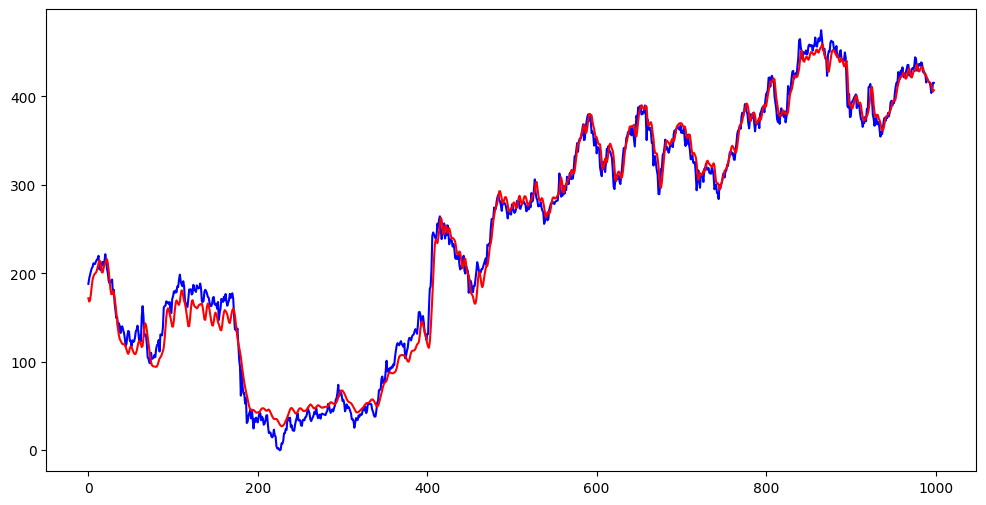

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b')
plt.plot(y_predicted, 'r')